In [18]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random,time

Ans 1) As per the question, the two matrices under consideration are of dimensions (n,k) (say, matrix A) and (k,m) (say, matrix B). So, the final product matrix C would be of dimension (n,m). For each element of C, we would need k multiplications and k-1 additions to multiply and add k corresponding elements. Since total elements in C is nm, which implies that multiplications = nmk and additions = nm(k-1). 

In [19]:
#Ans 2

n = 100
k = 50
m = 100

# Random initialization
A = [[random.randint(50 , 100) for i in range(k)] for j in range(n)]
B = [[random.randint(50 , 100) for i in range(m)] for j in range(k)]
C = [[0 for i in range(m)] for j in range(n)]

# Array of Time taken for each iteration
t = []
for _ in range(50):
    initial_time = time.time()
    for i in range(n):
        for j in range(m):
            for l in range(k):
                C[i][j]+=A[i][l]*B[l][j]
    final_time = time.time()
    t.append(final_time - initial_time)

t = np.array(t)

print(f"Using lists : {np.mean(t)}s ± {np.std(t)}")

Using lists : 0.18472065925598144s ± 0.006572442795460448


In [20]:
A = np.array(A)
B = np.array(B)
C = np.array(C)

t = []
for _ in range(50):
    initial_time = time.time()
    C = np.matmul(A, B)
    final_time = time.time()
    t.append(final_time - initial_time)

t = np.array(t)

print(f"Using Numpy arrays and matmul : {np.mean(t)}s ± {np.std(t)}")

Using Numpy arrays and matmul : 0.0004745578765869141s ± 6.986865568553727e-05


In [21]:
#Ans 3

# Using the method given in question
arr = np.random.randint(0,100,10)
print(f'Median obtained using np.median method is {np.median(arr)}')

def cal_median1(arr):
    n = len(arr)
    for i in range(len(arr)//2):
        maxelement = np.max(arr)
        arr = np.delete(arr,arr.argmax())
    if(n % 2 == 0):
        return (np.max(arr) + maxelement)/2
    else:
        return np.mex()
        
print(f'Median obtained using the cal_median1 method is {cal_median1(arr)}')

Median obtained using np.median method is 29.5
Median obtained using the cal_median1 method is 29.5


In [22]:
## by using some better method
arr1 = np.random.randint(0,100,9)
print(f'Median obtained using np.median method is {np.median(arr1)}')

def cal_median2(arr1):
    sorted_arr = np.sort(arr1)
    n = arr1.shape[0]
    if n % 2:
        return sorted_arr[(n)//2]
    else:
        return (sorted_arr[(n-1)//2] + sorted_arr[(n)//2])/2

print(f'Median obtained using the cal_median2 method is {cal_median2(arr1)}')

Median obtained using np.median method is 65.0
Median obtained using the cal_median2 method is 65


In [23]:
np_median = []
cal_median1_median = []
cal_median2_median = []

for n in range(10,1000,10): 
    n1 = []
    n2 = []
    n3 = []
    for i in range(100):
        arr = np.random.randint(0, 1000, (n))
        t1 = time.time()
        cal_median1(arr)
        t2 = time.time()
        n1.append(t2-t1)

        t1 = time.time()
        cal_median2(arr)
        t2 = time.time()
        n2.append(t2-t1)

        t1 = time.time()
        np.median(arr)
        t2 = time.time()
        n3.append(t2-t1)
    cal_median1_median.append(n1)
    cal_median2_median.append(n2)
    np_median.append(n3)
    
meanlists1 = np.mean(cal_median1_median, axis = 1)
meanlists2 = np.mean(cal_median2_median, axis = 1)
meanlists3 = np.mean(np_median, axis = 1)

stdlists1 = np.std(cal_median1_median, axis = 1)
stdlists2 = np.std(cal_median2_median, axis = 1)
stdlists3 = np.std(np_median, axis = 1)

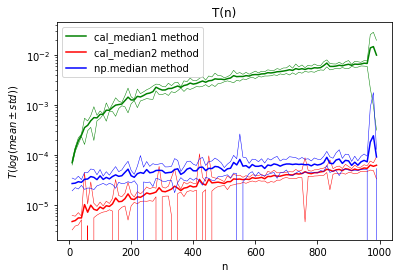

In [24]:
# Comparing the three methods using plot

plt.title("T(n)")
plt.xlabel("n")
plt.ylabel(r"$T(log(mean \pm std))$")
plt.yscale('log')
plt.plot(np.arange(10, 1000, 10), meanlists1 + stdlists1,  "g", linewidth=0.5)
plt.plot(np.arange(10, 1000, 10), meanlists1, "g", linewidth=1.5, label="cal_median1 method")

plt.plot(np.arange(10, 1000, 10), meanlists1 - stdlists1, "g", linewidth=0.5)
plt.plot(np.arange(10, 1000, 10), meanlists2 + stdlists2,  "r", linewidth=0.5)
plt.plot(np.arange(10, 1000, 10), meanlists2, "r", linewidth=1.5, label="cal_median2 method")

plt.plot(np.arange(10, 1000, 10), meanlists2 - stdlists2, "r", linewidth=0.5)
plt.plot(np.arange(10, 1000, 10), meanlists3 + stdlists3,  "b", linewidth=0.5)
plt.plot(np.arange(10, 1000, 10), meanlists3,"b", linewidth=1.5, label="np.median method")

plt.plot(np.arange(10, 1000, 10), meanlists3 - stdlists3, "b", linewidth=0.5)
plt.legend()
plt.show()

#Ans 4

$f(x,y)=x^2{y}+y^{3}\sin(x)\\
Gradient=\nabla{f}.{d}r\\
=\frac{\partial{f}}{\partial{x}}\hat{i}+\frac{\partial{f}}{{\partial}{y}}\hat{j}\\
=(2xy+y^3\cos(x))\hat{i}+(x^2+3y^2\sin(x))\hat{j}
$

In [25]:
#Ans 5
import numpy as np
from jax import grad
import jax.numpy as jnp
def f(x,y):
    return ((x**2)*y)+((y**3)*(jnp.sin(x)))
def f1x(x,y):
    return 2*x*y+(y**3)*(jnp.cos(x))
def f1y(x,y):
    return x**2+jnp.sin(x)*3*(y**2)    
dif_x = grad(f,0)
dif_y=grad(f,1)
for i in range(3):
  x=random.random()
  y=random.random()
  print(f" gradient from jax {dif_x(x,y)} | manually {f1x(x,y)}")  
  print(f" gradient from jax {dif_y(x,y)} | manually {f1y(x,y)}")


 gradient from jax 0.03579722344875336 | manually 0.03579722344875336
 gradient from jax 0.20343703031539917 | manually 0.20343703031539917
 gradient from jax 0.10053624212741852 | manually 0.10053624212741852
 gradient from jax 0.02078242227435112 | manually 0.02078242413699627
 gradient from jax 2.241919755935669 | manually 2.241919755935669
 gradient from jax 2.966503143310547 | manually 2.966503143310547


In [26]:
#Ans 6
from sympy import symbols
import sympy
x, y = symbols('x y')
f = x*x*y + y**3 * sympy.sin(x)
f.diff(x) #wrt x-axis

2*x*y + y**3*cos(x)

In [27]:
f.diff(y) #wrt y-axis

x**2 + 3*y**2*sin(x)

In [28]:
#Ans 7

student_database = {
    2022 : {
        "Branch 1" : {
            1 : {
            "Roll Number" : 1, 
            "Name" : "N", 
            "Marks" : {
                "Maths" : 100, 
                "English": 70
                }
            }
        },
        "Branch 2" : {}
    },
    2023 : {
        "Branch 1" : {},
        "Branch 2" : {},
    },
    2024 : {
        "Branch 1" : {},
        "Branch 2" : {},
    },
    2025 : {
        "Branch 1" : {},
        "Branch 2" : {},
    },
}

In [29]:
class student:
    def __init__(self, name, roll_number, marks_list):
        self.name=name
        self.roll_number=roll_number
        self.marks_list=marks_list
    def print_attributes(self):
        print("Name:",self.name, "Roll number:", self.roll_number, "Subjects Marks:", self.marks_list)

class branch:
    def __init__(self, branchname):  
        self.student_list=[]
        self.branchname=branchname
    def input_attributes(self, student):
        self.student=student
        temp_l=[]
        for i in self.student_list:
            temp_l.append(i.name)
        if student.name not in temp_l:
            self.student_list.append(self.student) #appending student objects to list
    def print_attributes(self):
        print(self.branchname)
        print("Students are as follows:")
        for i in self.student_list:
            i.print_attributes()
            
class year:
    def __init__(self, yeardate):
        self.branch_list=[]
        self.yeardate=yeardate
    def input_attributes(self, branch):
        self.branch=branch
        temp_l=[]
        for i in self.branch_list:
            temp_l.append(i.branchname)
        if branch.branchname not in temp_l:
            self.branch_list.append(self.branch) #appending branch objects to list
        else:
            for i in self.branch_list:
                if branch.branchname == i.branchname:
                    i.student_list.append(branch.student)
    def print_attributes(self):
        print("Year:",self.yeardate)
        print("Branches are as follows", end=' ')
        for i in self.branch_list:
            i.print_attributes()

years_list=[year(2022),year(2023)] # list of year objects
            
print("First year object's attributes after input")
student_1=student("Zeeshan",242,{"Math":90,"Eng":80})  
branch_1=branch("Branch 1")
branch_1.input_attributes(student_1)
branch_2=branch("Branch 2")
branch_2.input_attributes(student_1)
years_list[0].input_attributes(branch_1)
years_list[0].print_attributes()
print()

print("Second year object's attributes after input")
student_3=student("Wizard",123,{"Math":60})
student_2=student("Golem",100,{"Eng":70})
branch_3=branch("Branch 1")
branch_3.input_attributes(student_3)

branch_4=branch("Branch 1")
branch_4.input_attributes(student_2)
branch_5=branch("Branch 2")
branch_5.input_attributes(student_1)

years_list[1].input_attributes(branch_3)
years_list[1].print_attributes()
print()

print("Second year object's attributes after more input")
years_list[1].input_attributes(branch_4)
years_list[1].input_attributes(branch_5)
years_list[1].print_attributes()

First year object's attributes after input
Year: 2022
Branches are as follows Branch 1
Students are as follows:
Name: Zeeshan Roll number: 242 Subjects Marks: {'Math': 90, 'Eng': 80}

Second year object's attributes after input
Year: 2023
Branches are as follows Branch 1
Students are as follows:
Name: Wizard Roll number: 123 Subjects Marks: {'Math': 60}

Second year object's attributes after more input
Year: 2023
Branches are as follows Branch 1
Students are as follows:
Name: Wizard Roll number: 123 Subjects Marks: {'Math': 60}
Name: Golem Roll number: 100 Subjects Marks: {'Eng': 70}
Branch 2
Students are as follows:
Name: Zeeshan Roll number: 242 Subjects Marks: {'Math': 90, 'Eng': 80}


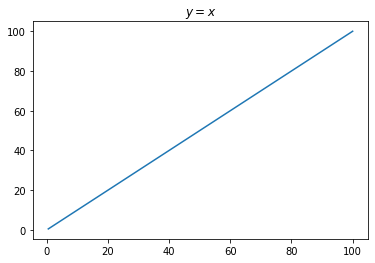

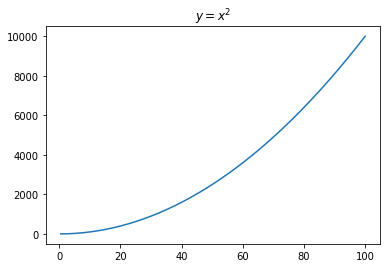

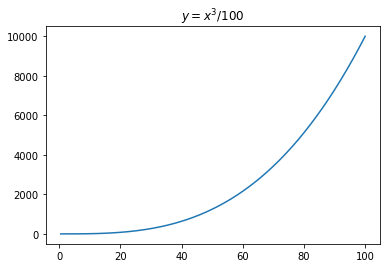

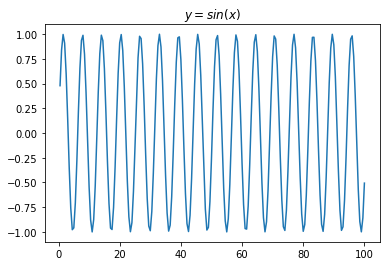

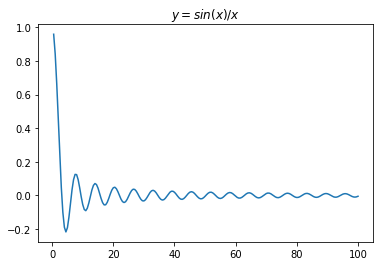

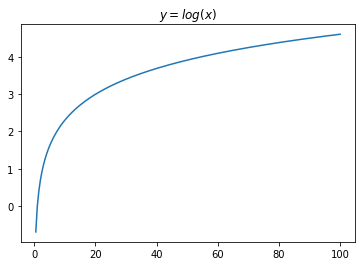

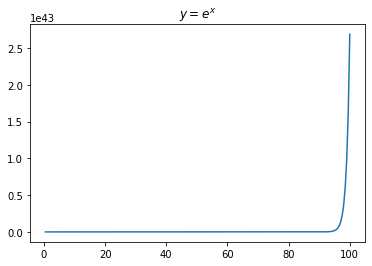

In [30]:
#Ans 9
x = np.arange(0.5,100.5,0.5)

plt.title("$y=x$")
plt.plot(x,x)
plt.show()

y = x**2
plt.plot(x, y)
plt.title("$y=x^2$")
plt.show()

y = (x**3)/100
plt.plot(x, y)
plt.title("$y=x^3/100$")
plt.show()

plt.plot(x, np.sin(x))
plt.title("$y=sin(x)$")
plt.show()

plt.plot(x, np.sin(x)/x)
plt.title("$y=sin(x)/x$")
plt.show()

plt.plot(x, np.log(x))
plt.title("$y=log(x)$")
plt.show()

plt.plot(x, np.exp(x))
plt.title("$y=e^x$")
plt.show()


In [31]:
#Ans 10
mat=np.random.uniform(1,2,size=(20,5))
print(mat)
col_lb=np.array(["a","b","c","d","e"])
t_d={}
for i in range(col_lb.size):
    t_d[col_lb[i]] = mat[:,i]

final_dataframe=pd.DataFrame(t_d)
print("Data Frame",final_dataframe,sep="\n")

std_dev_in_col = np.zeros(5)
print()

for i in range(final_dataframe.columns.size):
    std_dev_in_col[i]=np.std(final_dataframe[final_dataframe.columns[i]])

max_std_dev=np.max(std_dev_in_col)
max_std_dev_index=np.where(std_dev_in_col==max_std_dev)
print("Column containing maximum standard deviation is ", 
      final_dataframe.columns[max_std_dev_index[0]][0],", its SD is", max_std_dev)

mean_in_row=np.zeros(20)

for index,row in final_dataframe.iterrows():
    mean_in_row[index]=np.mean(row)

min_mean=np.min(mean_in_row)
min_mean_index=np.where(mean_in_row==min_mean)
print("Row containing minimum mean is",min_mean_index[0][0],", its mean is",min_mean)



print("\n\nAns 11\n")



#Ans 11

#column "f"
col_f = np.zeros(20)
for i,row in final_dataframe.iterrows():
    col_f[i] = np.sum(row)
final_dataframe['f'] = col_f
print(final_dataframe)

#column "g"
col_g = []
count_lt8=0
for i in range(20):
    if final_dataframe['f'][i] < 8:
        col_g.append("LT8")
        count_lt8+=1
    else:
        col_g.append("GT8")
final_dataframe['g'] = col_g
print(final_dataframe)

print("LT8:",count_lt8, "GT8:", 20-count_lt8)

l_t = []
g_t = []
for i in range(final_dataframe['f'].size):
    if(final_dataframe['f'][i] >= 8):
        g_t.append(final_dataframe['f'][i])
    else:
        l_t.append(final_dataframe['f'][i])
l_t_np = np.array(l_t)
g_t_np = np.array(g_t)

print("lesser than 8 of column g", l_t_np)
print("greater than 8 of column g", g_t_np)
print("Standard Deviation of LT8 is ", np.std(l_t_np), ", Standard Deviation of GT8 is ", np.std(g_t_np))

[[1.82457403 1.18928538 1.53304812 1.85399744 1.71897371]
 [1.11493039 1.21824377 1.77504461 1.53870787 1.10960974]
 [1.44561916 1.18216145 1.26183283 1.81398468 1.81942456]
 [1.1298061  1.08359135 1.75009919 1.76035533 1.77595817]
 [1.86427967 1.94259231 1.61874264 1.87918093 1.9616866 ]
 [1.18451541 1.7178352  1.60203838 1.47048672 1.3128342 ]
 [1.25893895 1.56271649 1.33674171 1.76651275 1.66091627]
 [1.78299882 1.87321728 1.33173869 1.74140803 1.18431829]
 [1.76572833 1.20243732 1.73767754 1.88065268 1.16151173]
 [1.38735889 1.39640919 1.05970321 1.25642683 1.91107672]
 [1.57474098 1.07170604 1.23357535 1.22002547 1.94804619]
 [1.03321803 1.34577856 1.06315379 1.18225057 1.97499671]
 [1.38700063 1.69294751 1.20193395 1.73686312 1.28363666]
 [1.41584095 1.56603777 1.69526989 1.19769412 1.28251035]
 [1.37587128 1.8525785  1.26622264 1.69798432 1.90282573]
 [1.08676346 1.34879949 1.3643988  1.12900963 1.25972514]
 [1.63770582 1.50526656 1.75484449 1.95760832 1.2932808 ]
 [1.66005649 1

In [32]:
#Ans 12
'''Broadcasting refers refers to the phenomenon of numpy "broadcasting" the smaller array onto the larger array 
subject to certain conditions. Examples are as follows:'''

'''Here, x is 2d array, while y is a random number. Upon various operations such as + and ==, y gets broadcasted
over the entire x, and the resultant's dimension is same as x.   '''
x=np.random.randint(1,5,(3,4))
y=random.randrange(1,5)
print("x=",x,"\ny=",y,"\nx+y=",x+y,"\nx==y:",x==y)

x= [[3 4 2 4]
 [3 1 2 4]
 [4 4 4 1]] 
y= 4 
x+y= [[7 8 6 8]
 [7 5 6 8]
 [8 8 8 5]] 
x==y: [[False  True False  True]
 [False False False  True]
 [ True  True  True False]]


In [33]:
'''Here, there are two arrays of different sizes. Upon operation between them, the smaller array repeats itself 
appropriately to match the larger array in dimension. Also, not every can be broadcasted to another array. There must
be some common dimension, about which the repetition occurs.'''

x=np.random.randint(1,5,(3,4))
y=np.random.randint(1,5,(3,1))
print("x=",x,"\ny=",y,"\nx+y=",x+y) # y repeated itself in terms of columns as the no of rows were same as x

x=np.random.randint(1,5,(2,3,4))
y=np.random.randint(1,5,(4))
print("\n\nx=",x,"\ny=",y,"\nx+y=",x+y) # y first became a 3d array of shape (1,1,4) and then repeated itself in terms of 
                                        # the first 2 dimensions as the 3rd dimension were same as x

x= [[3 4 3 3]
 [3 4 3 4]
 [2 4 3 4]] 
y= [[2]
 [2]
 [4]] 
x+y= [[5 6 5 5]
 [5 6 5 6]
 [6 8 7 8]]


x= [[[2 3 2 4]
  [4 4 4 4]
  [1 1 3 1]]

 [[3 4 3 4]
  [1 2 4 1]
  [3 4 1 2]]] 
y= [2 4 3 4] 
x+y= [[[4 7 5 8]
  [6 8 7 8]
  [3 5 6 5]]

 [[5 8 6 8]
  [3 6 7 5]
  [5 8 4 6]]]


In [34]:
#Ans 13

x=np.random.randint(1,5,(2,3,4))
print("x=",x)
print("Argmin obtained from inbuilt function is",np.argmin(x))


def cal_argmin(array_2d):
    array_2d_flattened = array_2d.flatten()
    min_el = np.min(array_2d_flattened)
    index = np.where(array_2d_flattened == min_el)
    first_time = index[0][0]
    return first_time

print("Argmin obtained using userdefined function",cal_argmin(x))


x= [[[1 3 4 3]
  [3 4 3 4]
  [2 4 4 1]]

 [[3 3 4 1]
  [2 2 4 4]
  [2 1 3 1]]]
Argmin obtained from inbuilt function is 0
Argmin obtained using userdefined function 0
